In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
codontab = {
    'AAA': 'K', 'AAG': 'K',
    'AGA': 'R', 'AGG': 'R', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 
    'CAC': 'H', 'CAT': 'H',

    'AGC': 'S', 'AGT': 'S', 'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'CAA': 'Q', 'CAG': 'Q',
    'TAC': 'Y', 'TAT': 'Y',

    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',

    'TTC': 'F', 'TTT': 'F',
    'TGG': 'W',
    'ATG': 'M',
    'TGC': 'C', 'TGT': 'C',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L', 
    # 'TAA': '*', 'TAG': '*', 'TGA': '*'
} # type

AAs = []
codons = []
for codon, AA in codontab.items():
    AAs.append(AA)
    codons.append(codon.replace('T','U'))

AA_codon = pd.DataFrame({'AA':AAs, 'codon':codons})
display(AA_codon)

,AA,codon
0,K,AAA
1,K,AAG
2,R,AGA
3,R,AGG
4,R,CGA
...,...,...
56,L,UUG
57,L,CUA
58,L,CUC
59,L,CUG


In [3]:
# Loading data
data = {}
for site in ['A']:
    data[site] = pd.read_csv(f'{Project}/Results/Tables/Codon_analysis/codon_prediction/v20250126/Subsequence abundance shift_{site}-site.tsv', sep='\t')
    data[site] = pd.merge(AA_codon, data[site], on='codon', how='left')
    data[site]['AA_codon'] = data[site]['codon']+' '+data[site]['AA']
    data[site] = data[site].set_index('AA_codon', drop=True).drop(columns=['AA','codon'])

display(data[site])

,D4a,D4b,D4c,D8a,D8b,D8c
AA_codon,,,,,,
AAA K,0.340753,0.125837,0.523223,0.840232,0.752535,1.868331
AAG K,-0.492917,-0.300890,-0.480578,-0.378426,-0.405109,-0.491432
AGA R,0.135087,0.167966,0.193572,0.185352,0.189209,0.118633
AGG R,0.015167,0.007421,0.017539,-0.051742,-0.053594,-0.187285
CGA R,-0.005150,0.117015,0.091504,-0.058002,-0.036226,-0.228335
...,...,...,...,...,...,...
UUG L,-0.209634,-0.061192,-0.137219,-0.098802,-0.109292,-0.259885
CUA L,-0.209039,-0.053451,-0.195014,-0.225651,-0.229490,-0.446020
CUC L,-0.173082,-0.154599,-0.083201,-0.212090,-0.298920,-0.416608


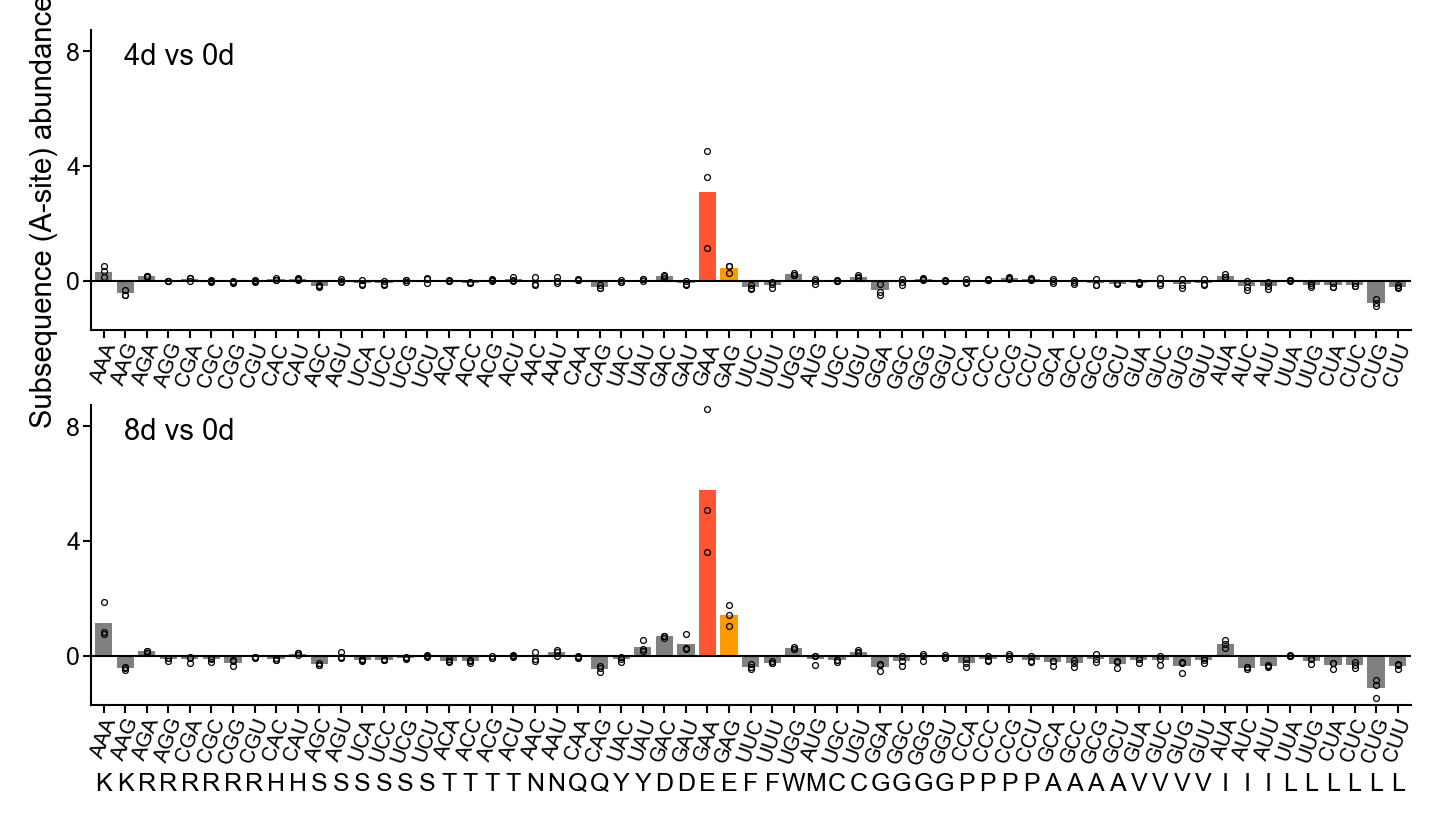

<Figure size 640x480 with 0 Axes>

In [4]:
site = 'A'

ylims = {'4' : (-1.7, 8.75),
         '8' : (-1.7, 8.75)}
yticks= {'4' : [0,4,8],
         '8' : [0,4,8]}

sF = 1 # Size factor
wgap = 0.1
hgap = 0.25
nrow, ncol = 2, 1

width_ratios = [4.4]
height_ratios = [1, 1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
for day in ['4','8']:
    
    tmp_data = data[site][[f'D{day}{rep}' for rep in ['a','b','c']]].copy()
    tmp_data['avg'] = tmp_data.mean(axis=1)

    ax = fig.add_subplot(grid[row,0])

    plot_data = tmp_data
    leng = len(plot_data)

    ax.bar([*range(leng)], plot_data.mean(axis=1).tolist(), width=0.8, color=['gray']*28+['#FF5533','#FF9900']+['gray']*31)
    for rep,s in zip(plot_data.keys(),[30,30,30]):
        ax.scatter([*range(leng)], plot_data[rep], s=2, c='#FFFFFF00', edgecolors='k', lw=0.3, zorder=1.5)
    ax.axhline(0, c='k', lw=0.5)
    
    ax.set_xlim(0 -0.6, leng -0.4)
    ax.set_ylim(ylims[day])
    ax.set_xticks(range(leng))
    ax.set_yticks(yticks[day])
    ax.set_xticklabels(plot_data.index.str[:-2], rotation=70, fontsize=5, ha='center')
    if day=='8':
        for i, AA in enumerate(plot_data.index.str[-1]): ax.text(i, -4.7, AA, fontsize=6, ha='center')
    ax.tick_params(width=0.5, length=2, pad=0.5)
    
    ax.text(3.5, 8.3, f'{day}d vs 0d', fontsize=7, va='top', ha='center')
    # ax.text(6, 5.2, f'(7215 genes)', fontsize=6, va='top', ha='center')
    if day=='4':
        ax.set_ylabel('Subsequence (A-site) abundance shift', labelpad=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    

    row += 1

plt.savefig(f'Subsequence abundance shift_{site}-site-codon_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()